In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import wrangle
import exploration
import seaborn as sns
import exploration

In [2]:
#bringing in and cleaning my data using the wrangle function
z_df = wrangle.wrangle_zillow()



/Users/jarad/codeup_data_science/zillow_home_prediction_project/wrangle.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fed_code"] = df["fips"].astype(int)
/Users/jarad/codeup_data_science/zillow_home_prediction_project/wrangle.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_built"] = df["yearbuilt"].astype(int)
/Users/jarad/codeup_data_science/zillow_home_prediction_project/wrangle.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [3]:
# Checking the top and last 5 rows of the database
z_df.head(-5)

,regionidcounty,fed_code,home_value,sq_ft,lot_size,pools,garages,pool_encoded,bed_bath_ratio,overall_size,house_age
1,2061.0,6111,464000.0,1465.0,12647.0,False,1.0,0,2.000000,14112.0,50
2,1286.0,6059,564778.0,1243.0,8432.0,True,2.0,1,1.500000,9675.0,55
3,3101.0,6037,145143.0,2376.0,13038.0,True,0.0,1,1.333333,15414.0,47
4,3101.0,6037,773303.0,2962.0,63000.0,True,0.0,1,1.333333,65962.0,67
5,3101.0,6037,218552.0,738.0,4214.0,False,0.0,0,2.000000,4952.0,95
...,...,...,...,...,...,...,...,...,...,...,...
52430,3101.0,6037,97499.0,1281.0,12000.0,False,0.0,0,1.000000,13281.0,63
52431,3101.0,6037,603333.0,1472.0,4454.0,False,0.0,0,1.500000,5926.0,90
52433,3101.0,6037,312183.0,912.0,4995.0,False,0.0,0,2.000000,5907.0,70
52434,3101.0,6037,332251.0,2068.0,7333.0,False,0.0,0,1.333333,9401.0,50


In [4]:
# Checking to see if the data was properly cleaned by checking for nulls
z_df.isnull().sum()

regionidcounty    0
fed_code          0
home_value        0
sq_ft             0
lot_size          0
pools             0
garages           0
pool_encoded      0
bed_bath_ratio    0
overall_size      0
house_age         0
dtype: int64

In [5]:
# Before exploring the variables, the code below splits data into the test, validate, and train so that there is no data leakage
z_train, z_test = train_test_split(z_df, train_size=0.8, random_state=123)
z_train, z_validate = train_test_split(z_train, train_size=0.7, random_state=123)

#Confirming the code above works and to see the amount of data I have to work with 
z_train.shape, z_validate.shape, z_test.shape

((25635, 11), (10987, 11), (9156, 11))

In [6]:
# The exoploration.py function to pair plots requires a list of values. This is my list of values 
cols_to_plot = ['bed_bath_ratio','sq_ft', 'home_value', 'lot_size', 'house_age', 'overall_size', 'pool_encoded', 'garages']

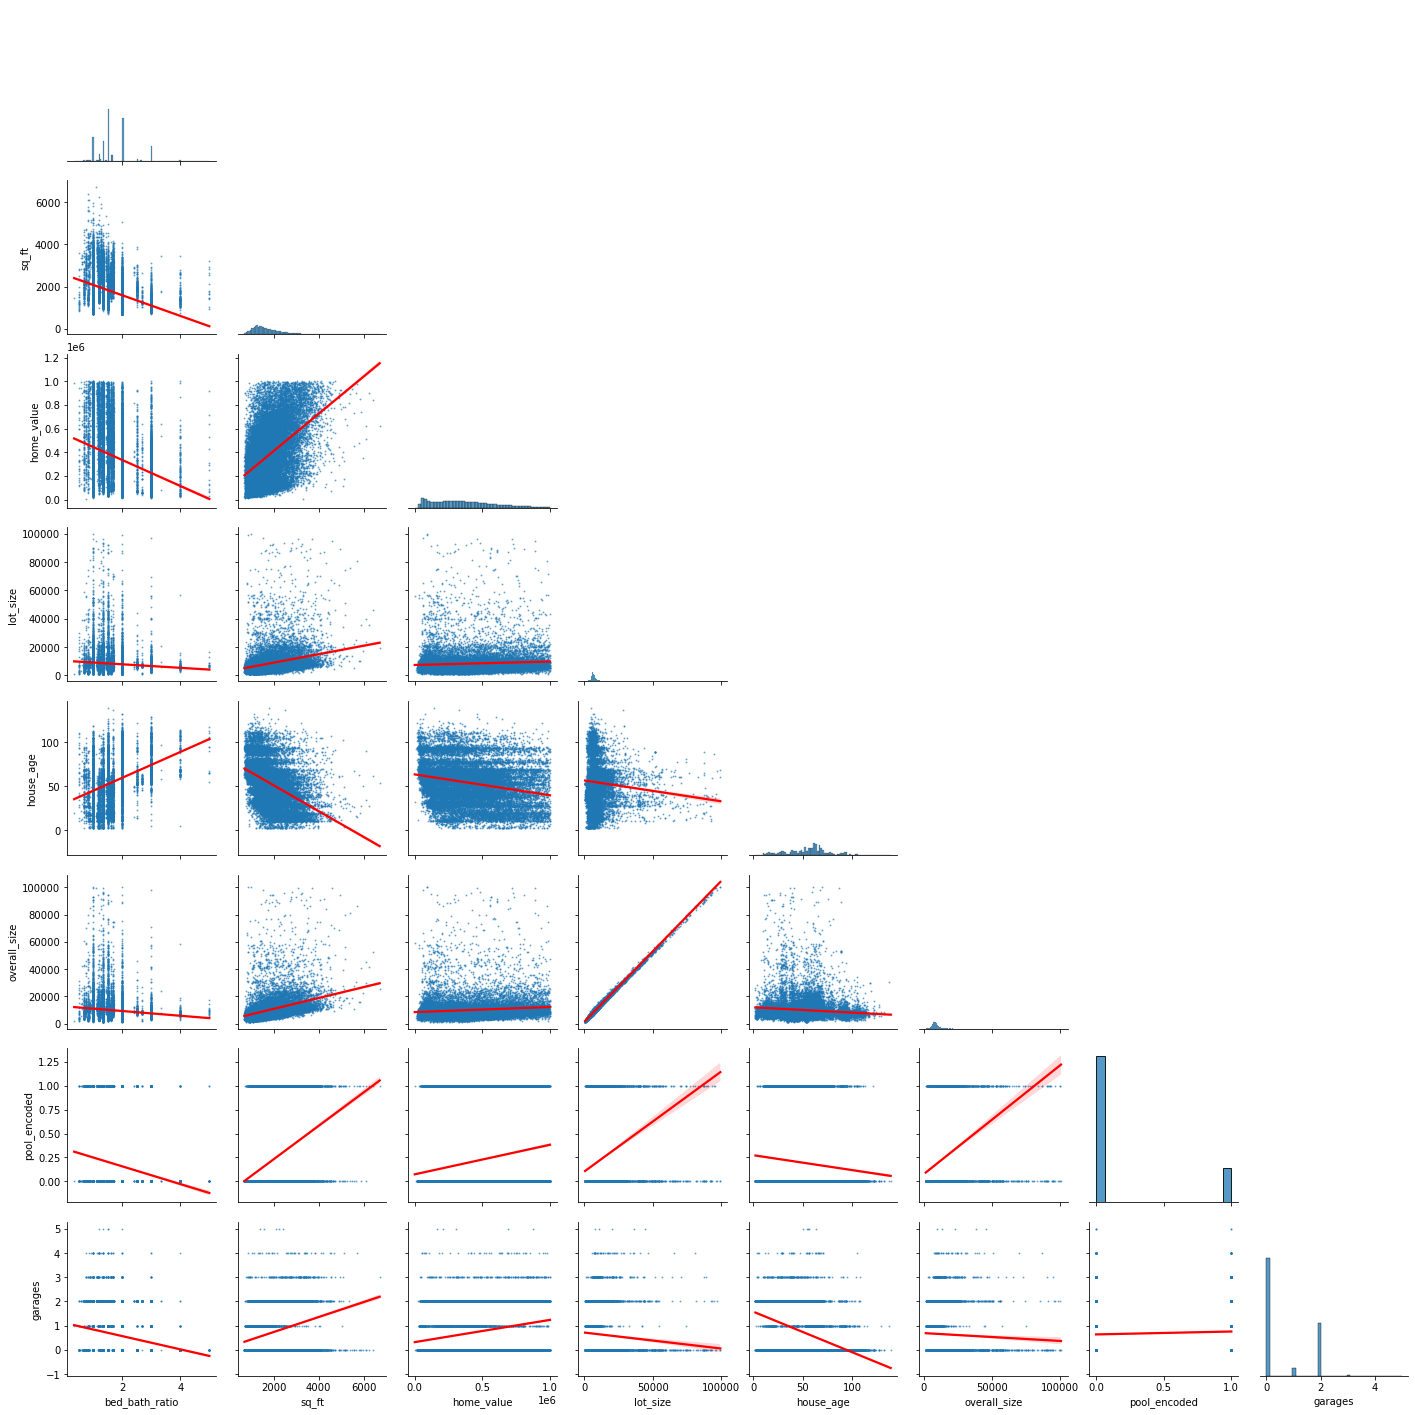

In [7]:
# Bringing in the function to plot variable pairs to see correlations and trends
exploration.variable_pairs_plot(z_train, cols_to_plot)

## Takeaways
---

- Sq ft has the largest correlation with home value
- The bed bath ratio shows another good correlation with home value. I made the ratio to take away the multicolinearity of having both bed and bath included
- 20 % of the dataset has a pool and those with a pool have a good correlation to home value
- garages show a correlation and will have to be investigated for statistical significance 
- house age has a negate correlation to home price. the older the home the less valuable but has a lot of variance. Well taken care of and historical old homes may be worth more
- Overall size and lot size are very similar becuase the house makes up a small portion of larger lots.

In [8]:
# Filling in the required columns asked for in the exploration file. Seperating the columns between continuous and categorical to further exploration.
cont_cols = ['sq_ft', 'bed_bath_ratio', 'lot_size', 'home_value']
cat_cols = ['garages', 'pool_encoded', 'fed_code', 'regionidcounty']

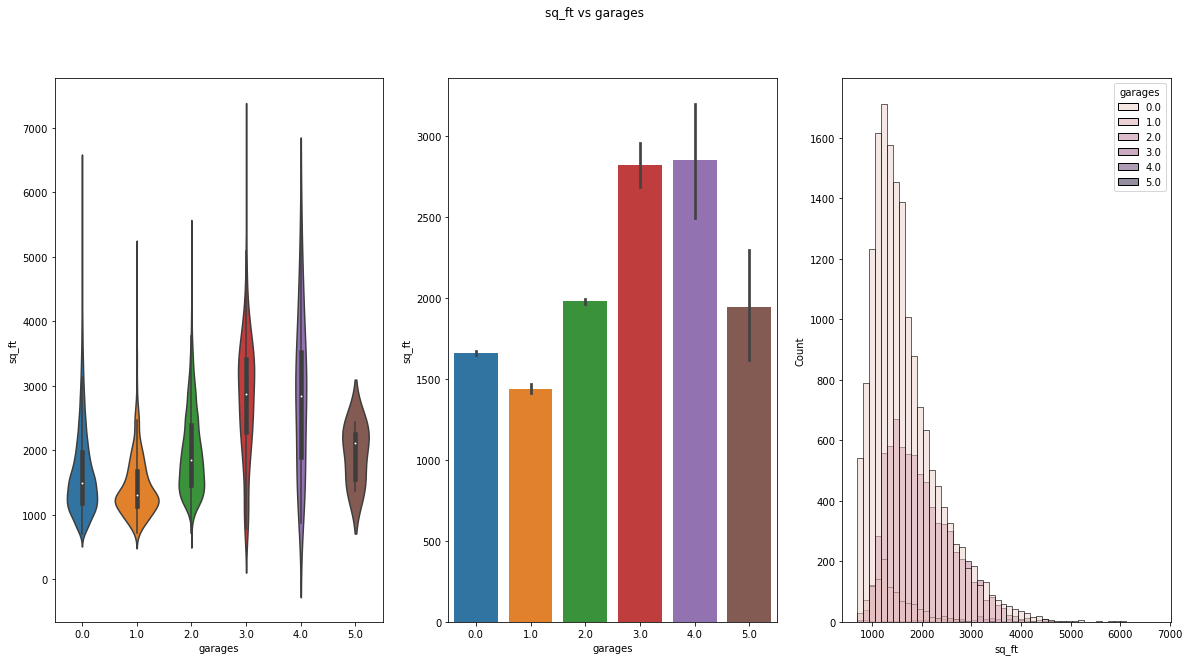

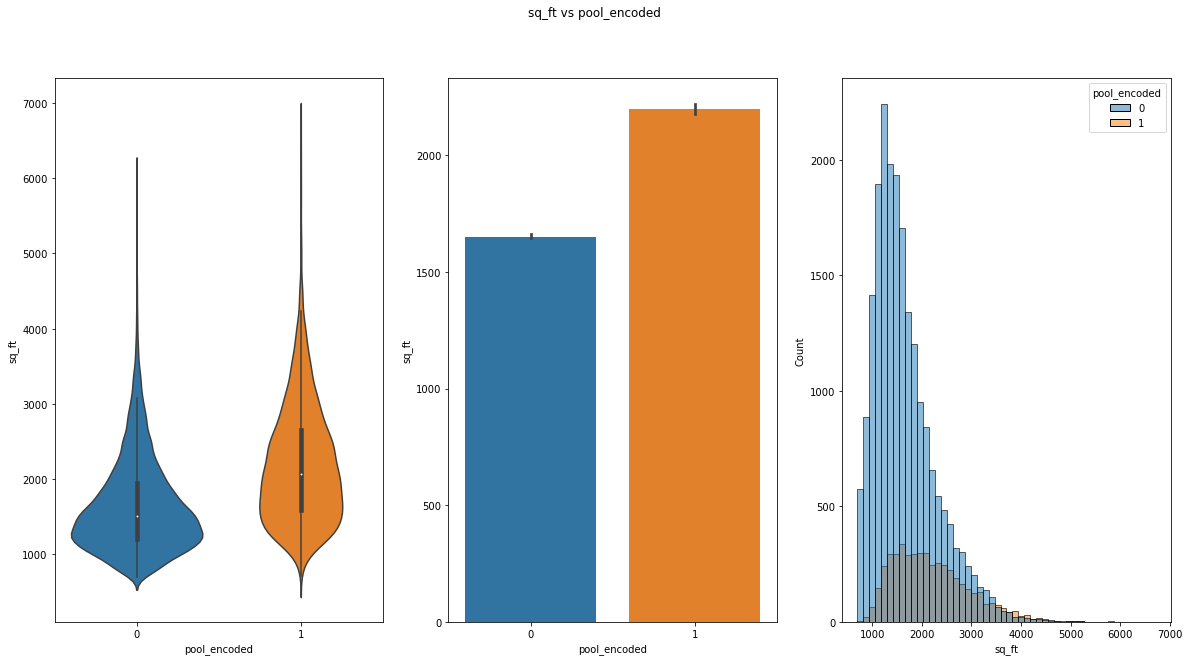

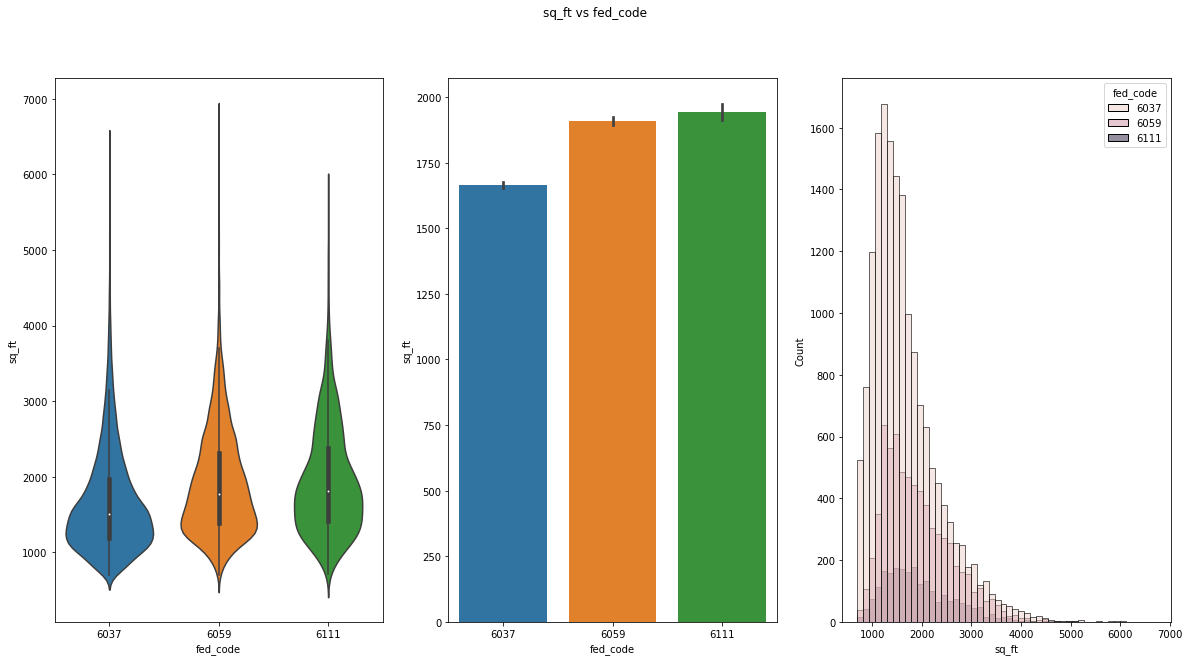

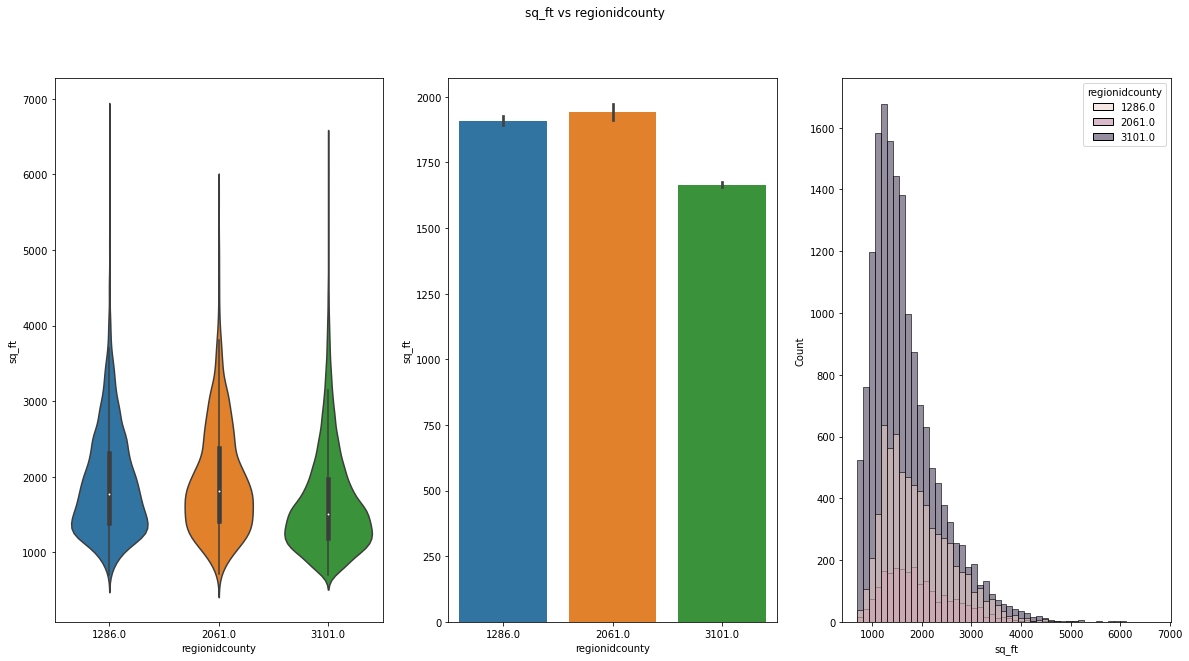

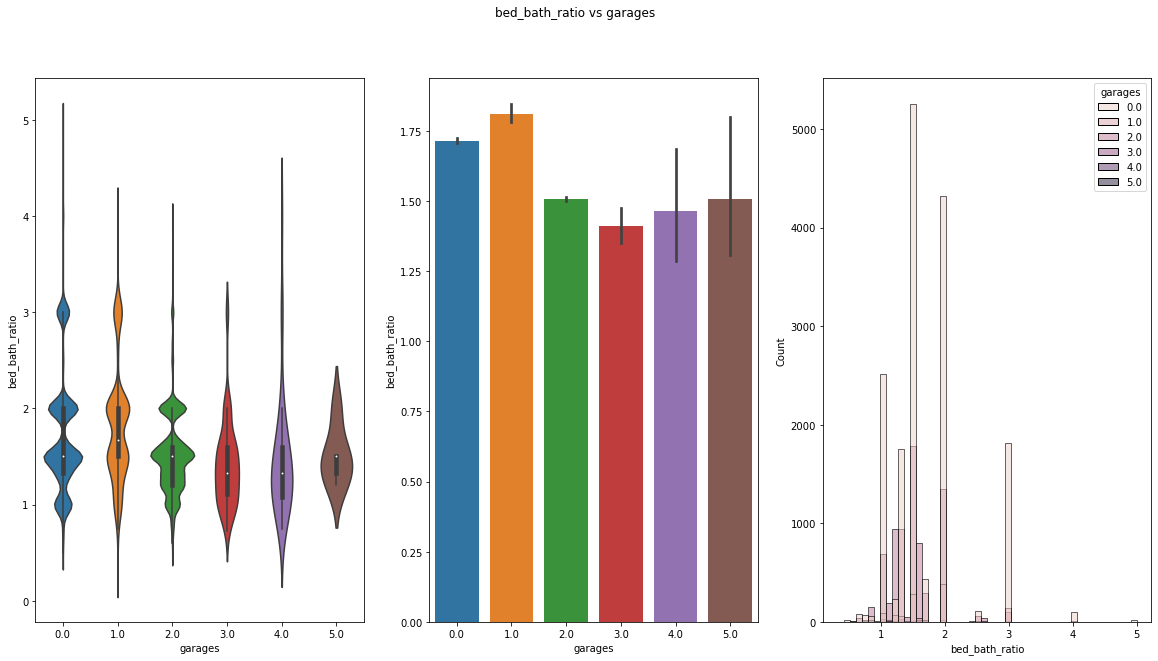

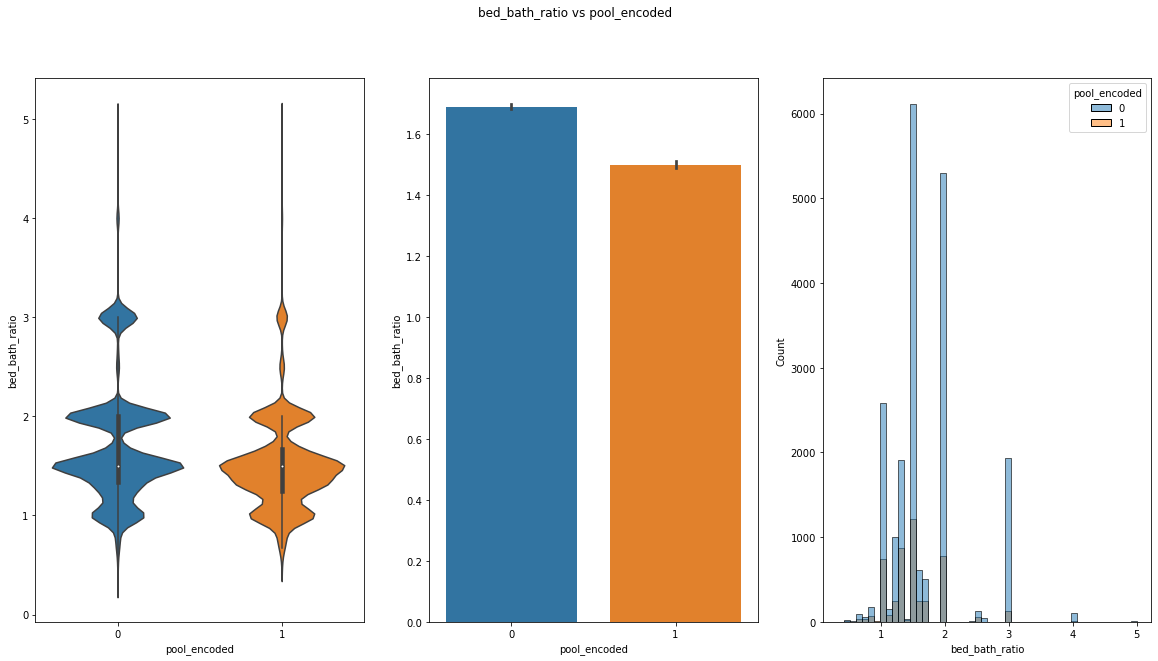

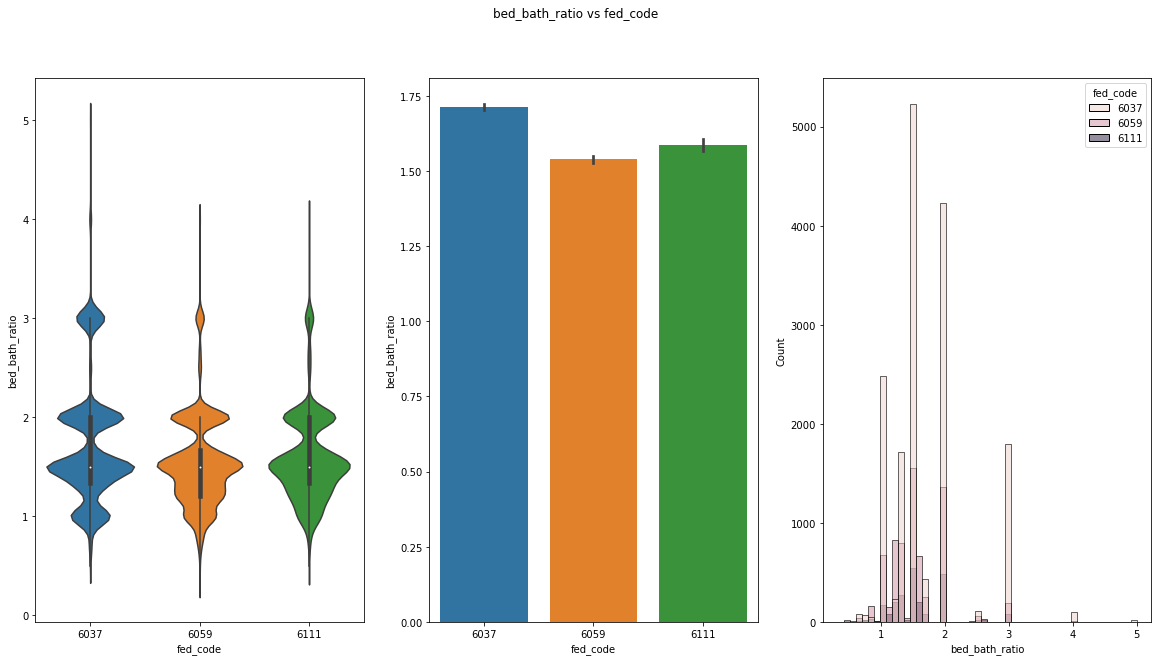

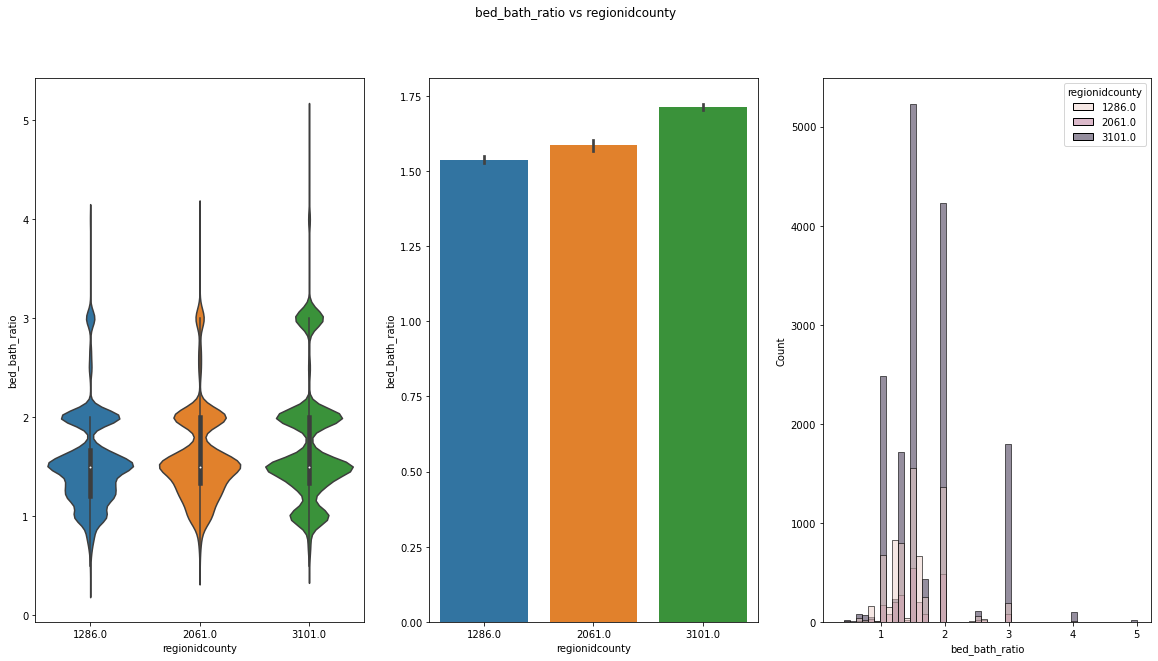

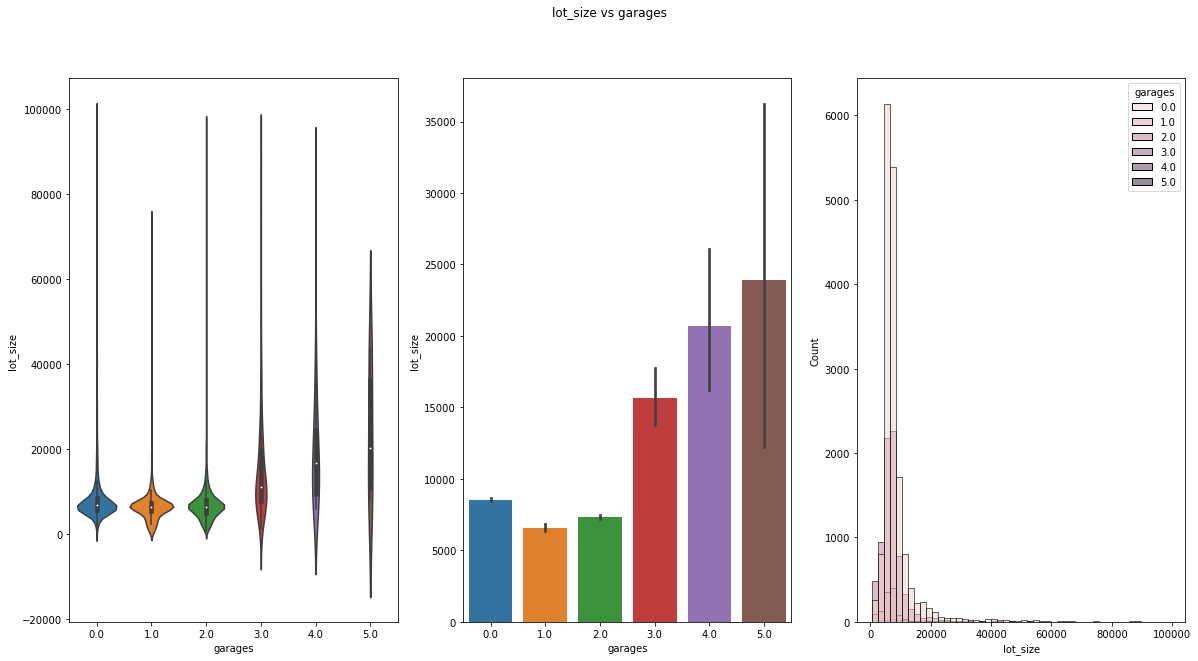

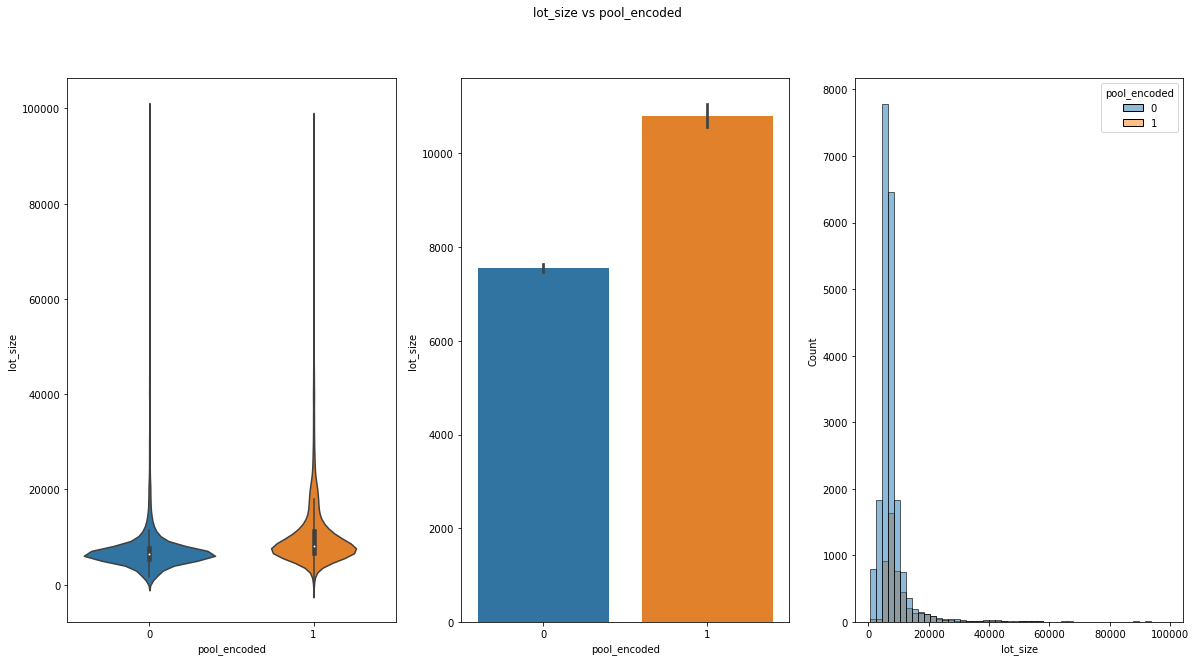

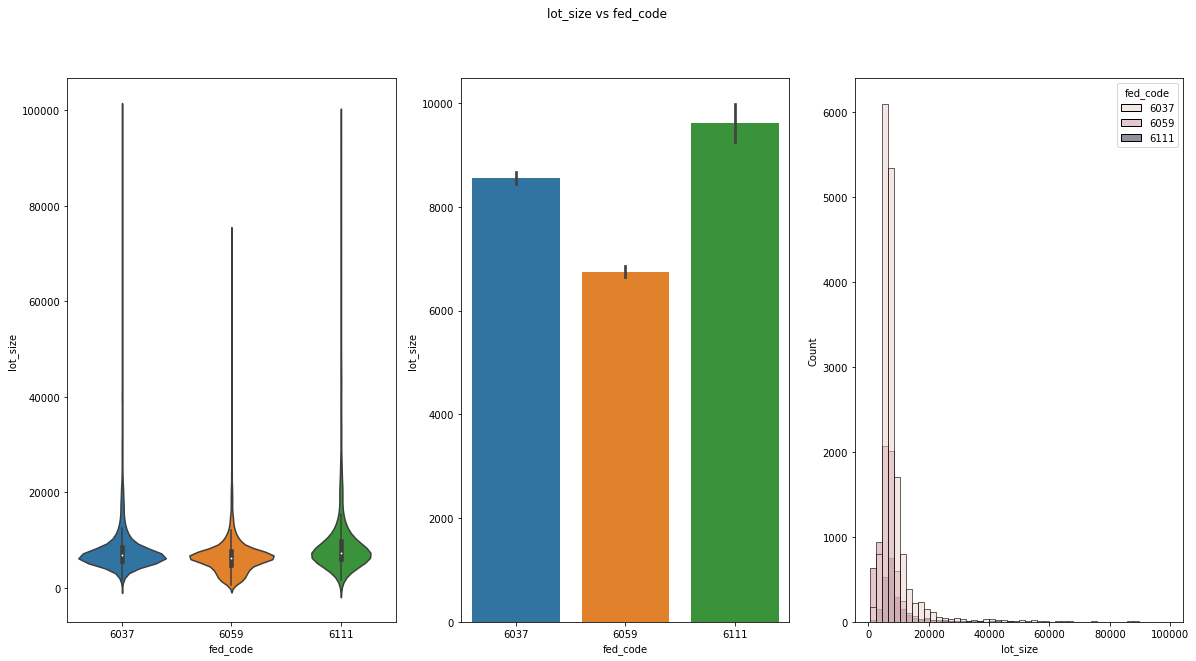

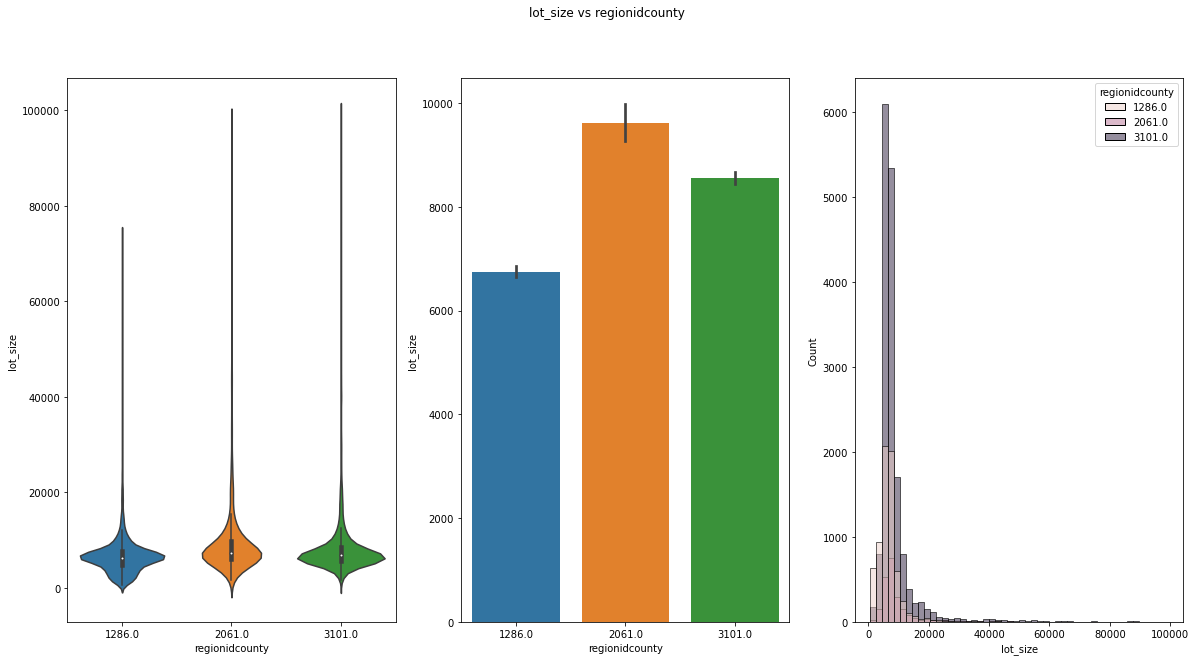

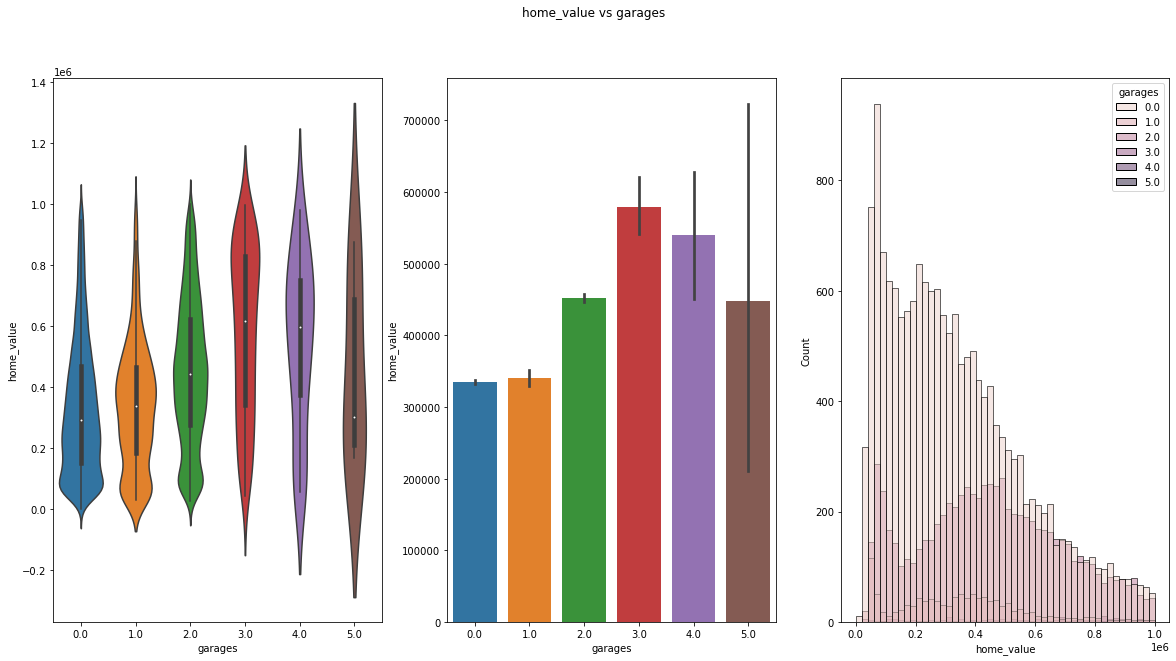

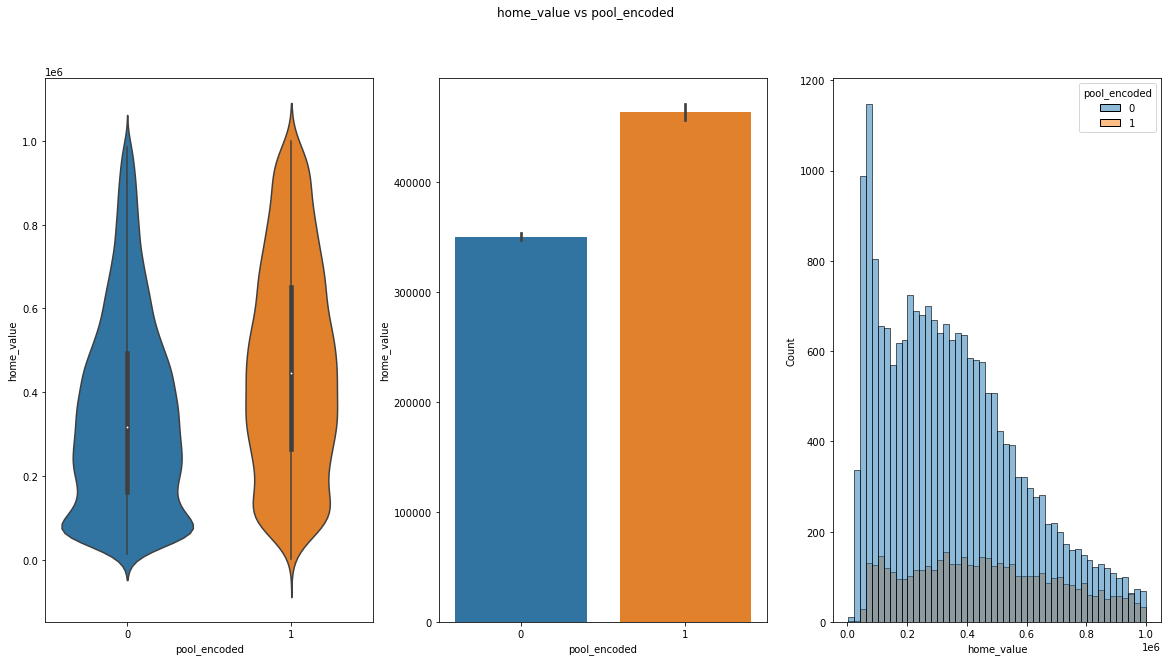

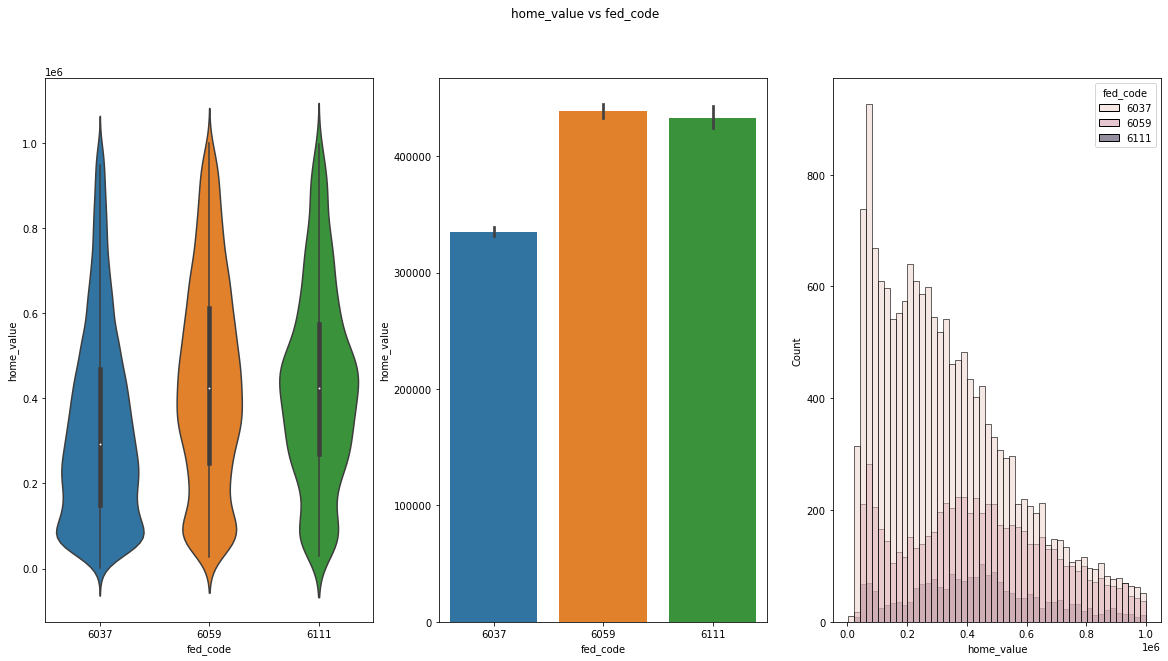

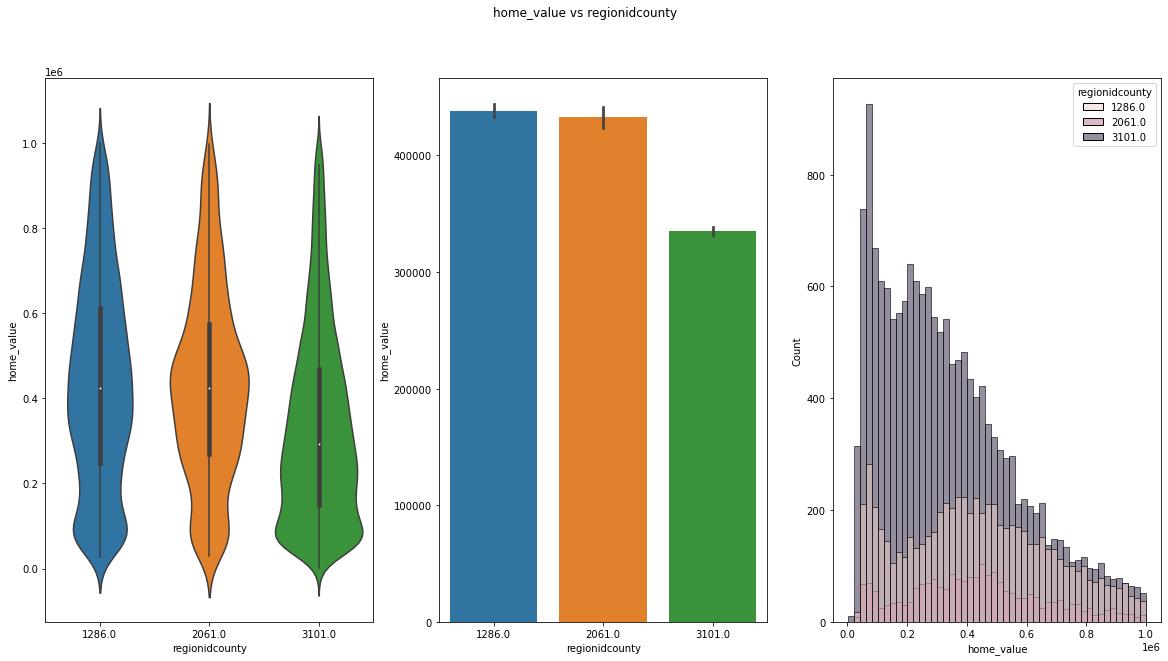

In [9]:
# pulling in the fucntion from explore to bring in three different visuals for each pair

exploration.plot_categorical_and_continuous_vars(z_train, cat_cols, cont_cols)

## Take aways
---
- Sq ft vs garage is skewed to the left with the bulk of the properties do not garages and after a house reaches 2000 sq ft the majority have over 2 car garages
- The larger the house the more likely the possibility of having a pool, the bulk of the houses do not have pools, and about 20% have pools
- The federal code in 6037 has an overall lower square foot, again the data is skewed to the left
- Region county shows a similar stat 
- Bed bath ratio vs garage does not really tell us a whole lot nor does the bed bath ratio vs pools 
- The federal code and bed bath ratio looks fairly even across however the ratio increase as it goes into different reasons
- As lot size increases so does the car count of garages
- As expected as lot increases the probability of the owners having a pool 
- Federal code also seems influence lot size as well as region county id
- Home value and garages shows a decent amount of variance as you increase the amount of garages
- Pools shows an increase in home value when there is a pool
- The federal code also shows difference in value depending on the code
- The same can be said for region region has an influence on house price


## Come up with some initial hypotheses based on your goal of predicting property value.

1. How does the house value relate the overall square foot? lotsize plus sq_ft
2. Does the bedroom to bathroom ratio affect home value?
4. How does having a pool affect house value?
5. Does the age of the house affect house value?

<AxesSubplot:>

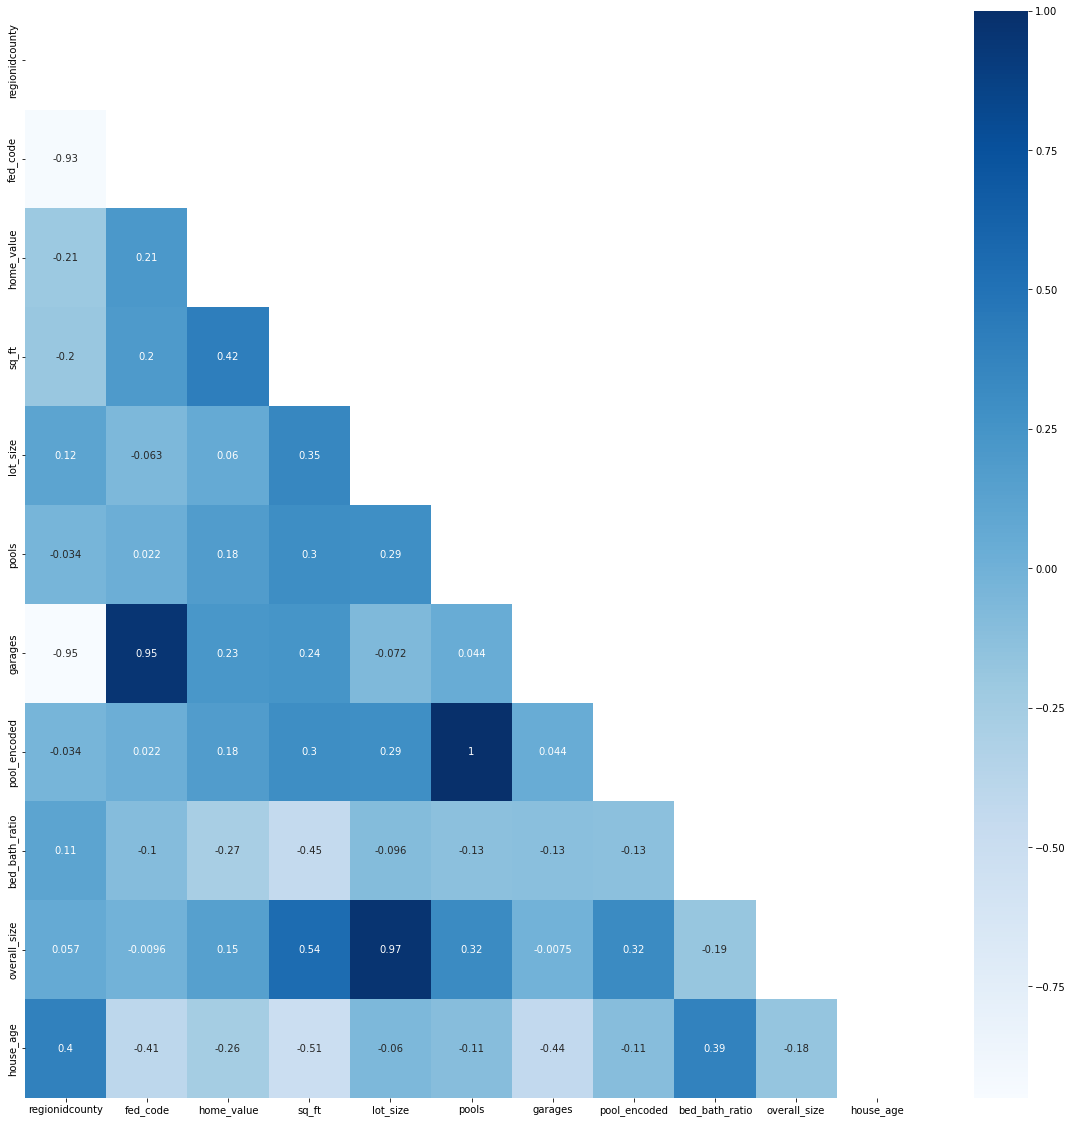

In [10]:
# making a correlation table using spearman becuase data is not normally distributed
correlation_table = z_train.corr(method='spearman')

# Declaring a size for the heatmap and making heatmap to see the correlations between all variables in the dataset
plt.figure(figsize= (20,20))
sns.heatmap(correlation_table, cmap='Blues', annot = True, mask = np.triu(correlation_table))

### __Take Aways__
---

* There is multicolinearity amongst multiple variables
* We can see why tax amount would be cheating becuase it is almost 1
* Using lot size does not have correlation to target value as much as sq_ft but I will make new variable to try and get around that
* I will also make a bed bath ratio so that we can avoid the multicolinearity between the two 

---
### Questions and Statistical Tests

---
* How does the house value relate the overall square foot? lotsize plus sq_ft

In [11]:
# running a spearman correlation test because the data is continuous but skewed to the right

corr, p = stats.spearmanr(z_train.overall_size, z_train.home_value)

corr, p


(0.15094940580939775, 1.6683803582435705e-130)

Aside from being statistically significant, the value of a home is positively correlated to the overall size of the property. 

---

### Question 2

* Does the bedroom to bathroom ratio affect home value?

In [12]:
corr, p = stats.pearsonr(z_train.bed_bath_ratio, z_train.home_value)

corr, p

(-0.2607193747181896, 0.0)

The bed to bath ratio is negatively correlation. If the house has more bedrooms than bathrooms, the ratio will be higher and have a negative value on the house. The lower the ration the higher the value impact.

---

### Question 3

* How does having a pool affect house value?

In [13]:
# Because this is a categorical vs continuous, I will use a t test.
t, p = stats.ttest_ind(z_train.pool_encoded,z_train.home_value, equal_var=False)
t, p / 2

(-252.05783188545095, 0.0)

I can confidently say that whether a house has a pool or not impacts the value of a house. 

### Splitting the data for Modeling
---
* Also using select k best and recursive feature engineering to determine best variables

In [14]:
# assign X and y variables
x_train = z_train.drop(columns = 'home_value')
x_validate = z_validate.drop(columns = 'home_value')
x_test = z_test.drop(columns = 'home_value')

y_train = z_train['home_value']
y_validate = z_validate['home_value']
y_test = z_test['home_value']


### Time to Scale
---
* Scaling any variable that covers the size as well as garages in order to compare features equally 

In [15]:
# Pulling in the min max function to scale the desired features and checks output below
x_train_scaled, x_validate_scaled, x_test_scaled = wrangle.MinMax_scaler(z_train, z_validate, z_test)

#Checking how the scaler worked on the data
x_train_scaled.head()

,regionidcounty,fed_code,home_value,sq_ft,lot_size,pools,garages,pool_encoded,bed_bath_ratio,overall_size,house_age
38634,1.000000,0.0,0.919814,0.031614,0.057813,0.0,0.0,0.0,0.357143,0.057048,0.569343
20546,0.426997,1.0,0.442500,0.150250,0.031405,0.0,0.4,0.0,0.185714,0.037860,0.021898
38206,1.000000,0.0,0.061143,0.103661,0.061353,0.0,0.0,0.0,0.250000,0.064964,0.379562
51571,1.000000,0.0,0.323794,0.139268,0.045119,0.0,0.0,0.0,0.357143,0.050901,0.459854
39931,1.000000,0.0,0.366508,0.142762,0.068736,0.0,0.0,0.0,0.250000,0.074719,0.372263


(array([1.000e+01, 1.500e+01, 3.900e+01, 4.300e+01, 1.100e+02, 1.330e+02,
        2.110e+02, 2.320e+02, 3.050e+02, 3.890e+02, 4.920e+02, 7.800e+02,
        9.210e+02, 1.158e+03, 1.373e+03, 1.556e+03, 1.481e+03, 1.631e+03,
        1.602e+03, 1.551e+03, 1.356e+03, 1.341e+03, 1.182e+03, 1.112e+03,
        9.930e+02, 8.790e+02, 7.670e+02, 7.890e+02, 5.860e+02, 5.770e+02,
        4.700e+02, 3.940e+02, 2.980e+02, 2.620e+02, 1.720e+02, 1.310e+02,
        9.800e+01, 6.900e+01, 3.300e+01, 4.000e+01, 1.800e+01, 5.000e+00,
        1.000e+01, 6.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

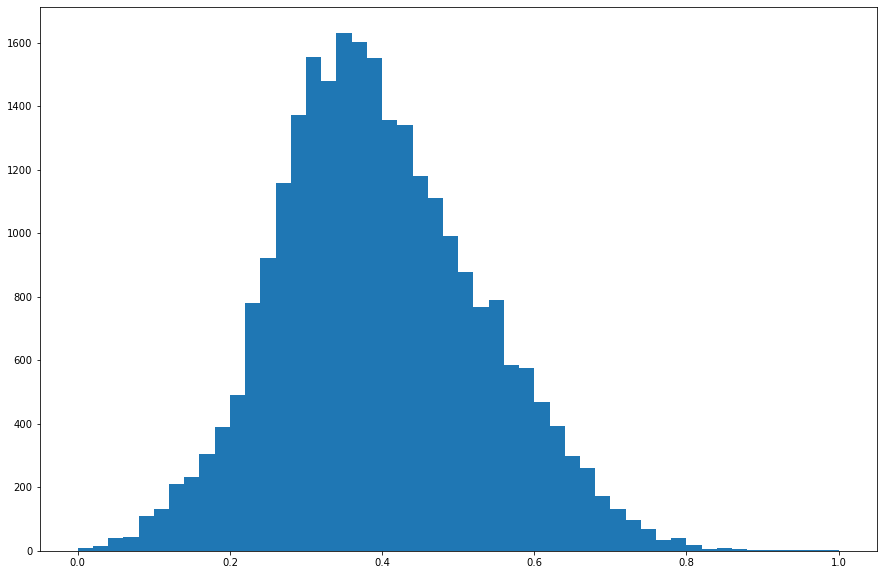

In [16]:
x_train_scaled['sqr_trans'] = np.sqrt(x_train_scaled.sq_ft)

plt.figure(figsize=(15,10))
plt.hist(x_train_scaled.sqr_trans, bins=50)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


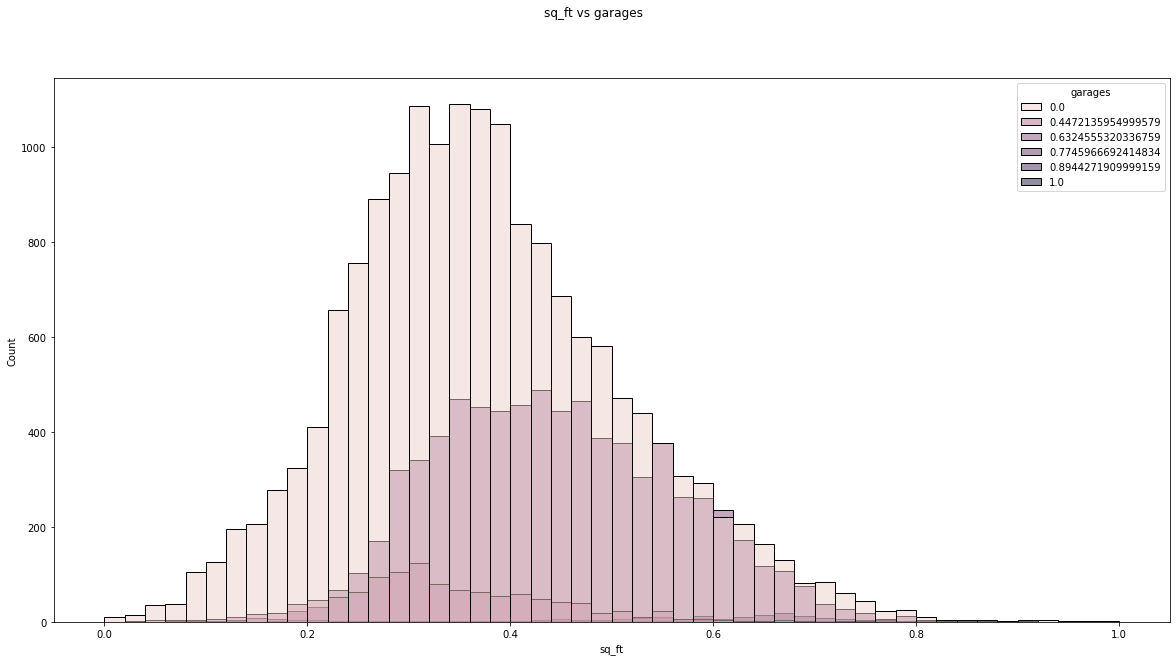

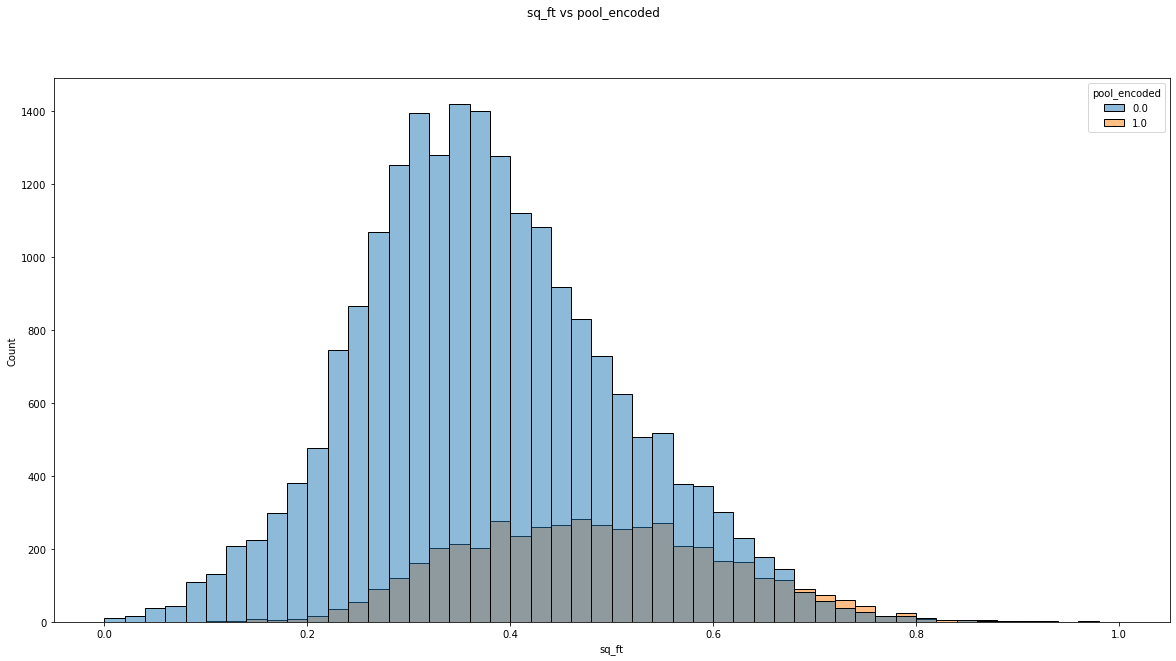

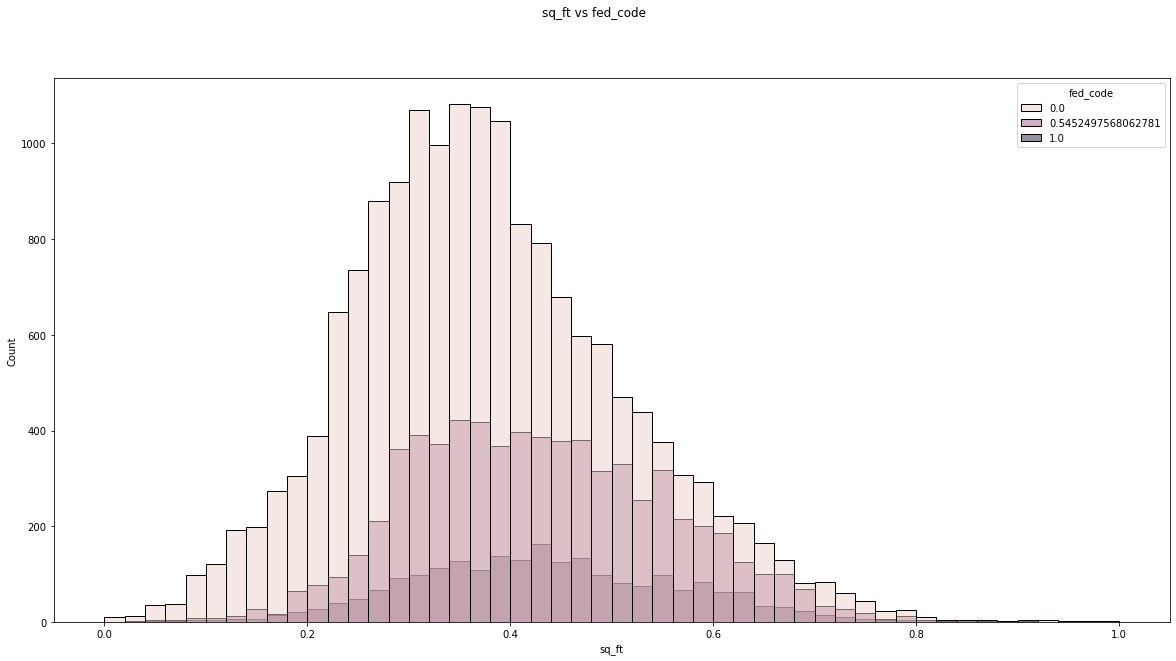

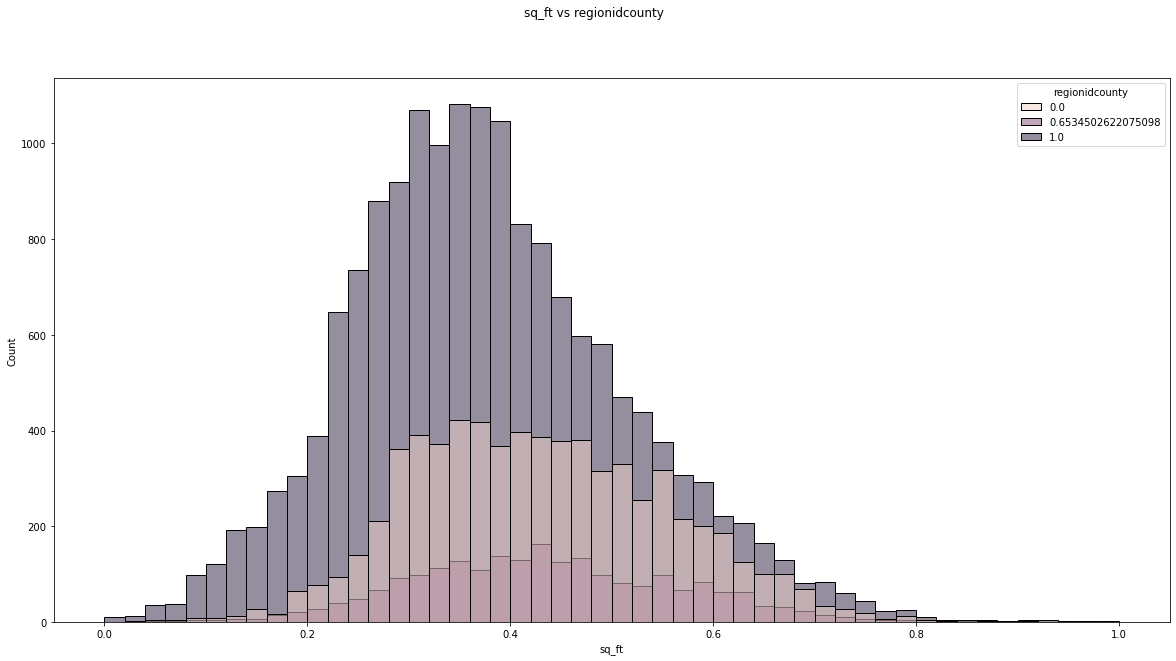

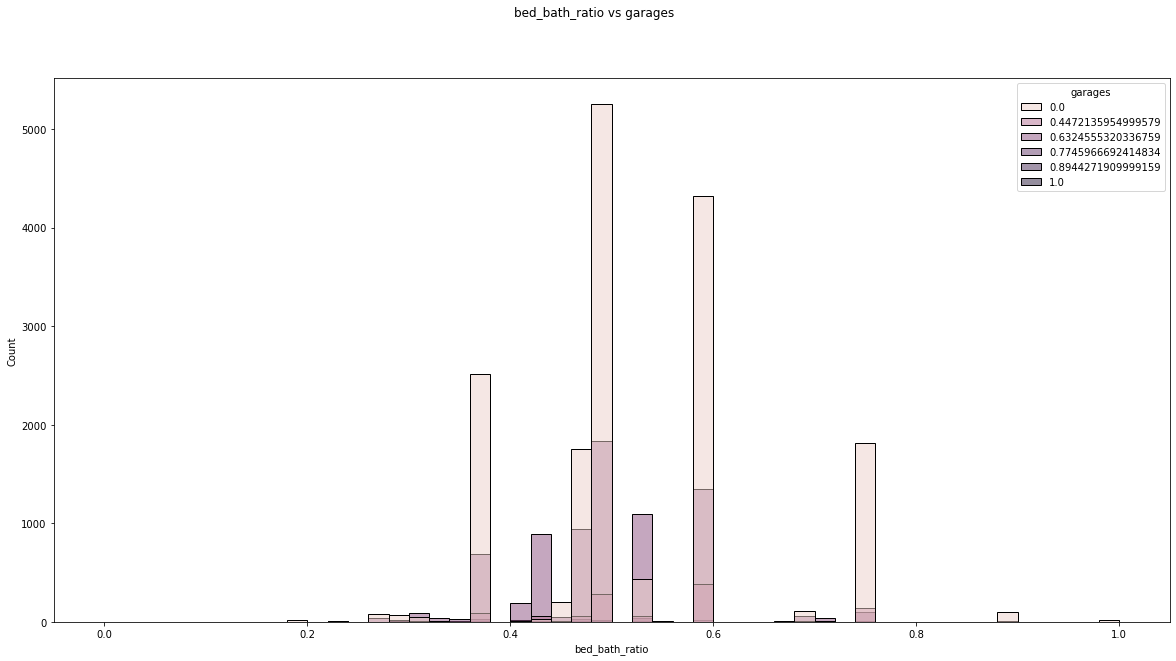

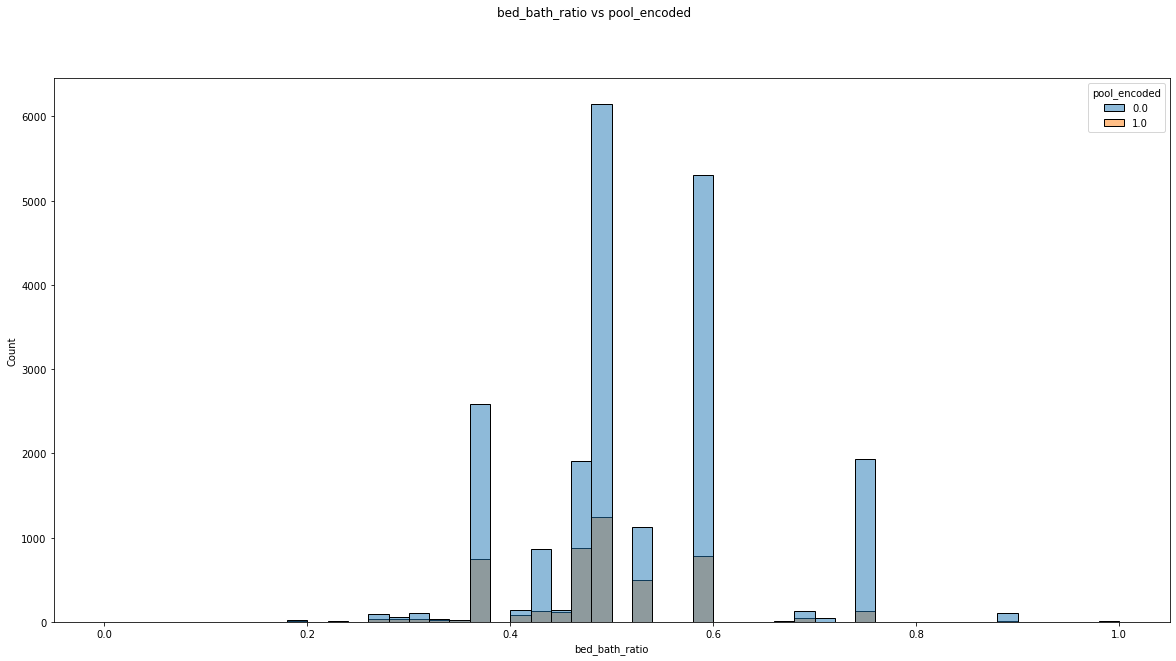

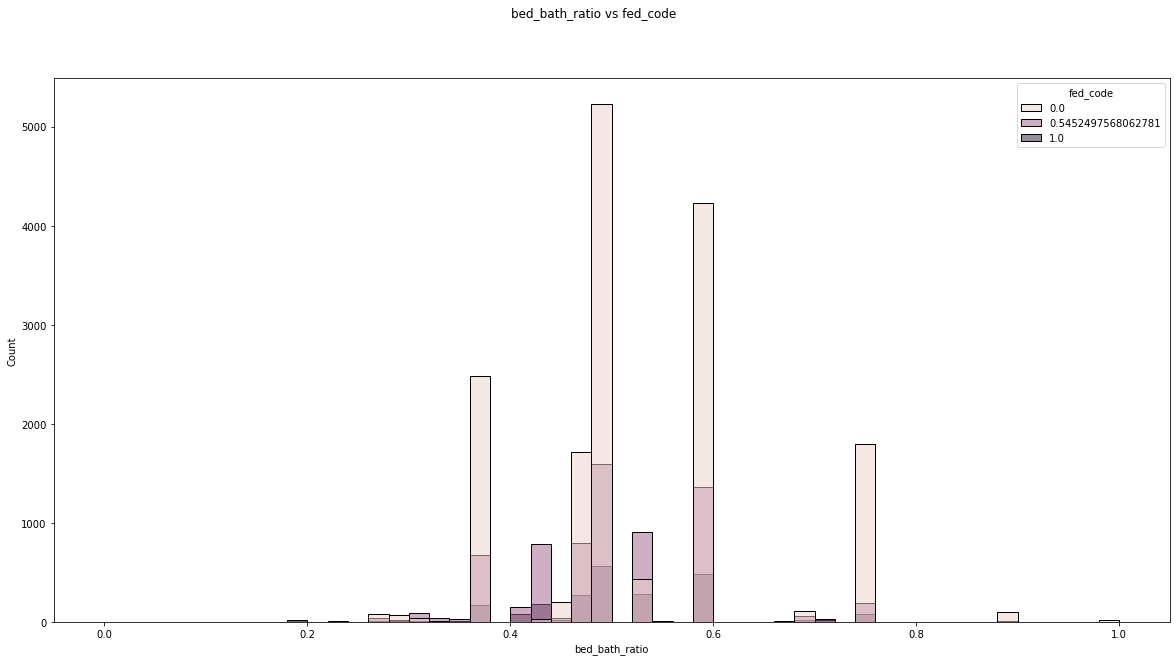

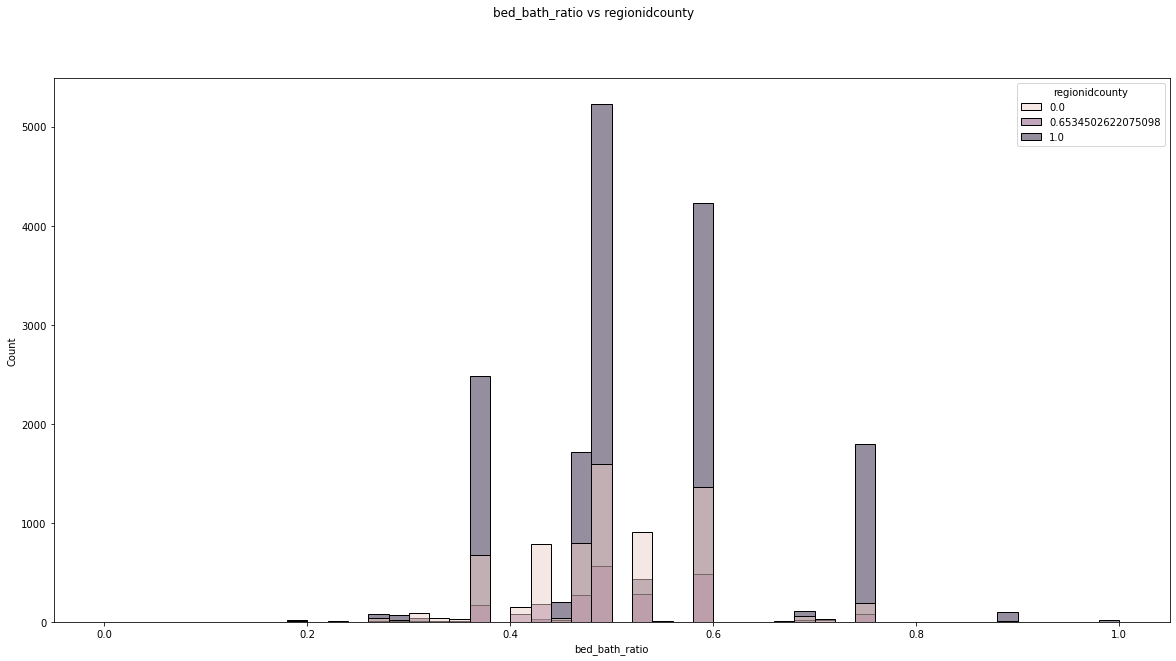

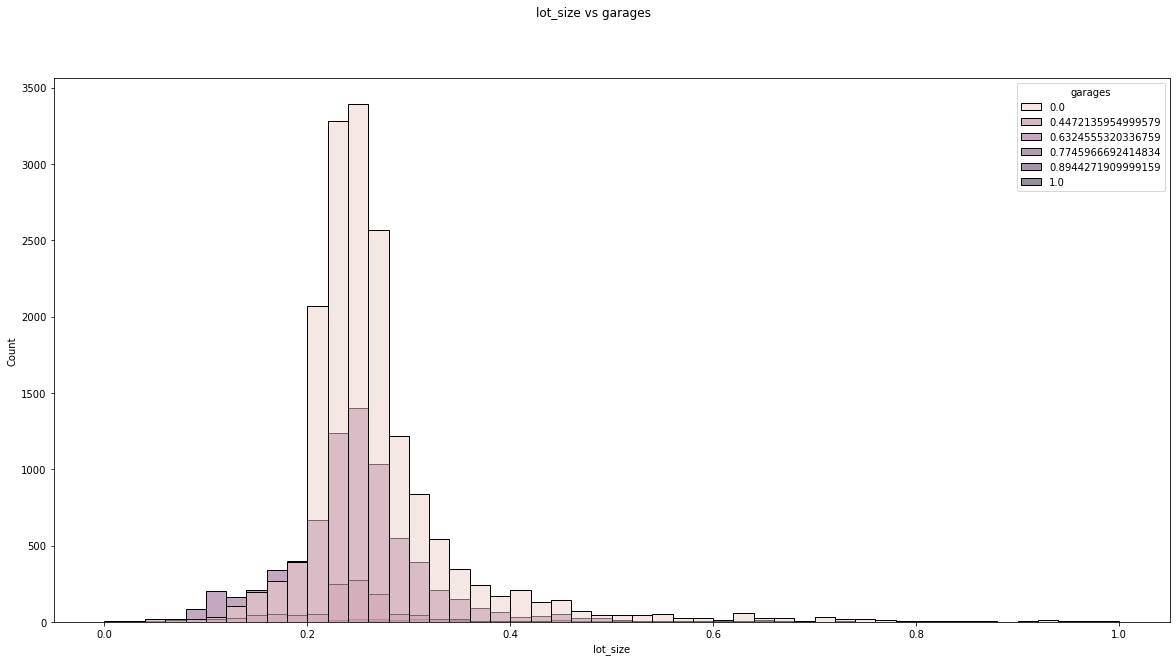

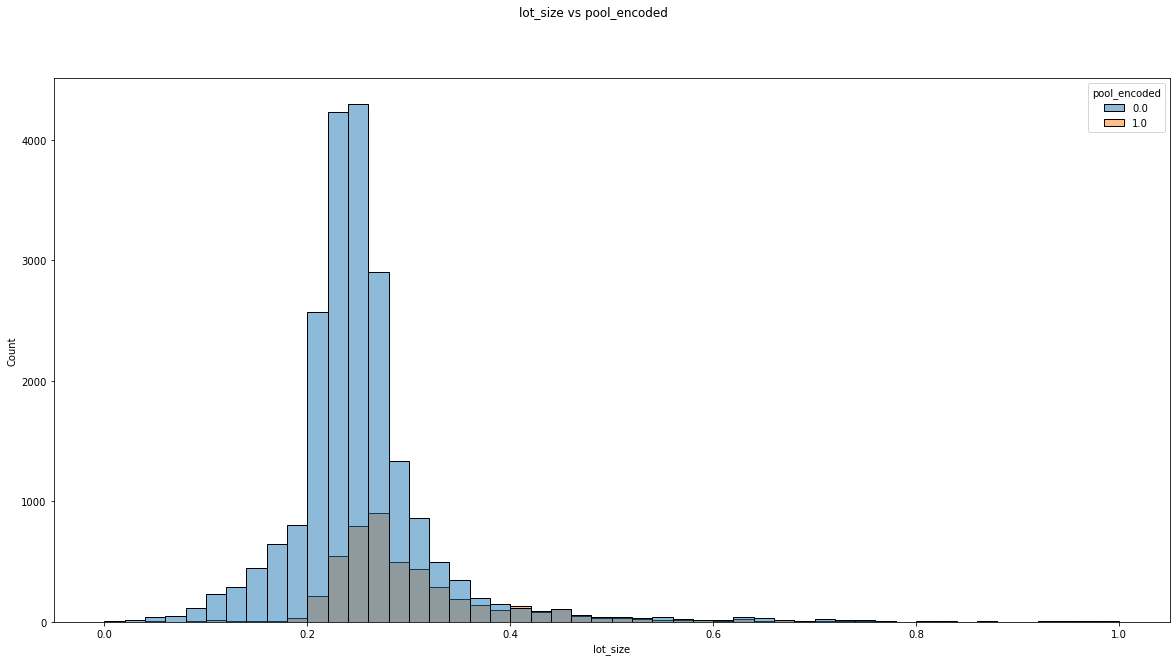

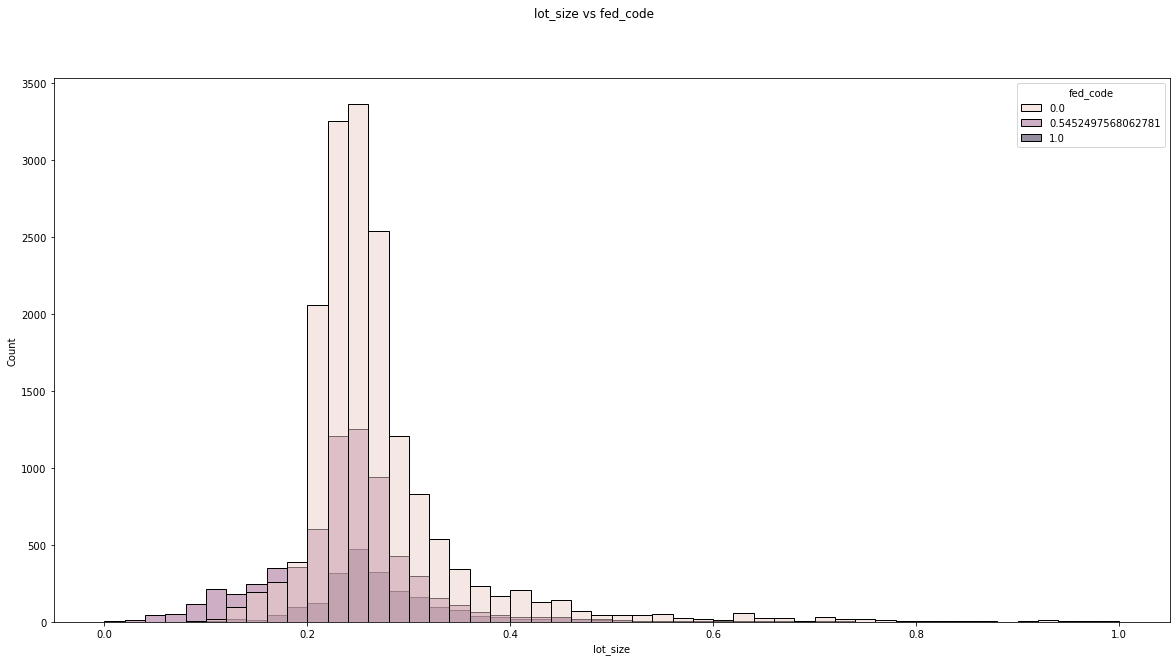

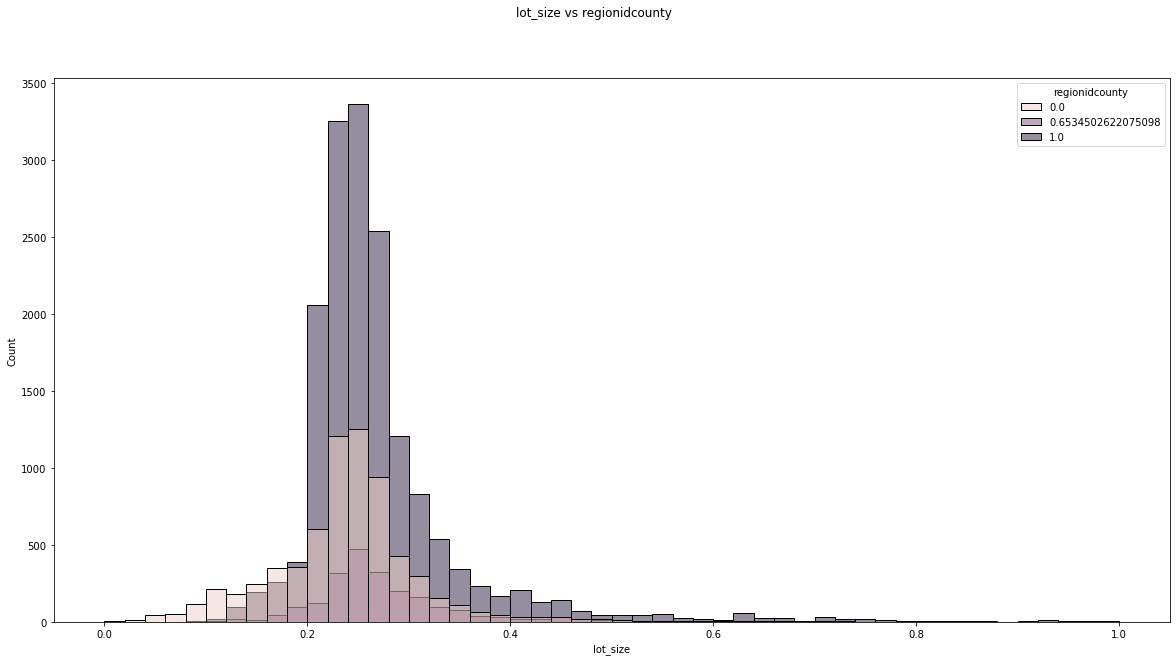

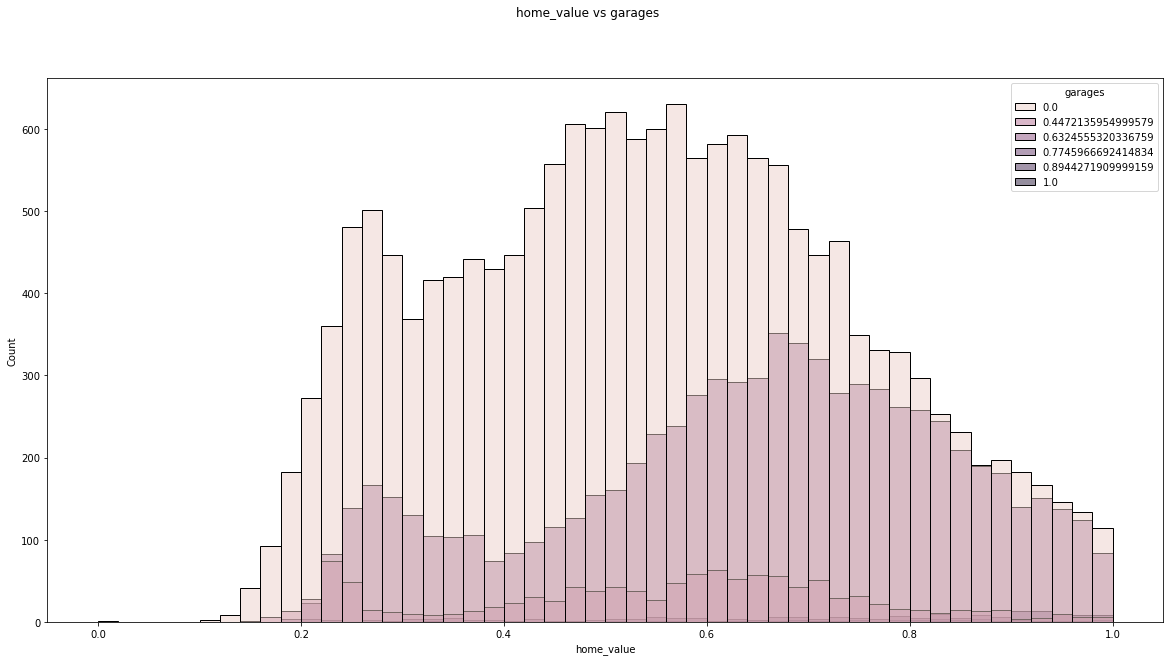

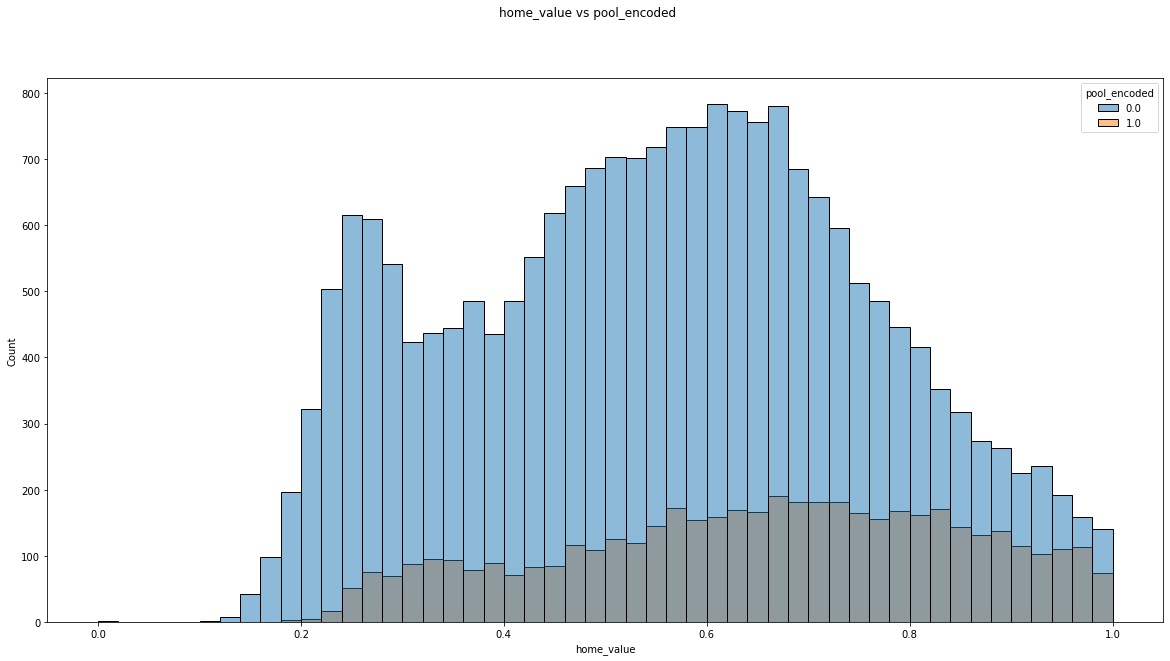

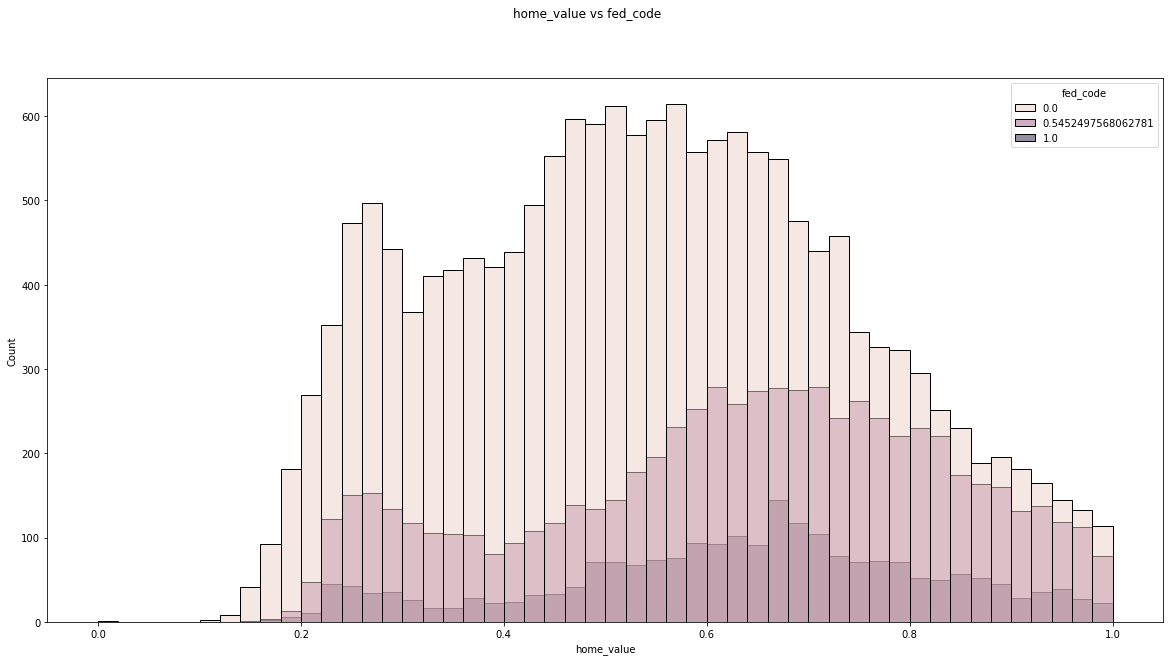

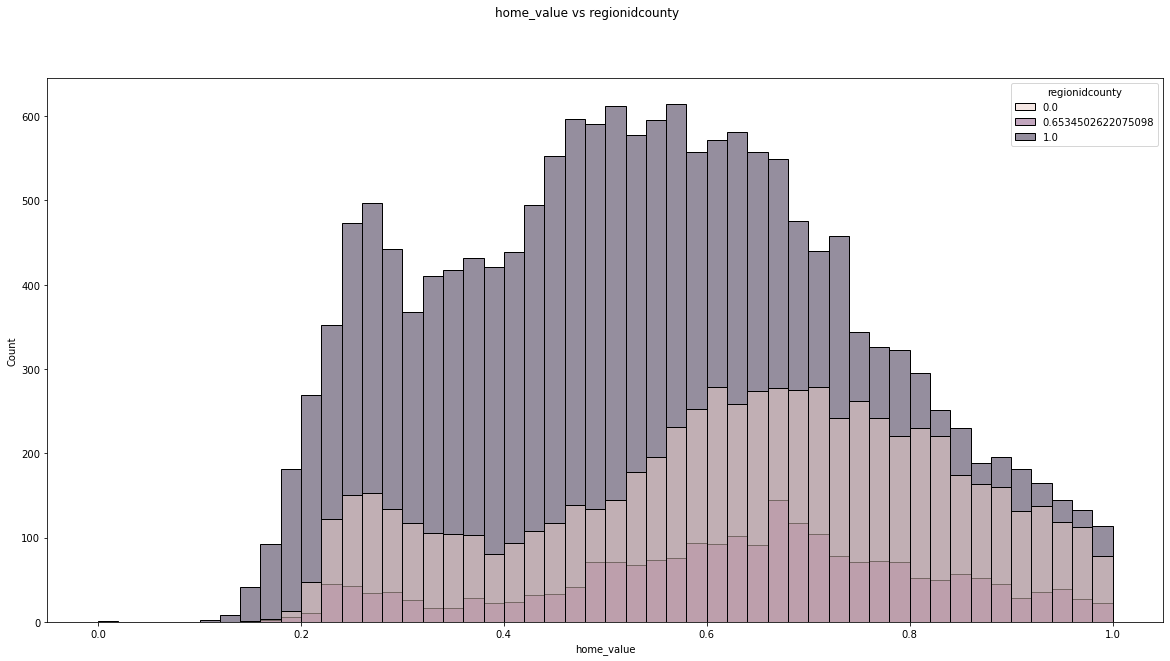

In [17]:
# The oringal data is skewed to the right and in order to used OLS and Lasso Lars regression, the data should normally distributed. I transformed the data using the square root method to normalize the data and assign it to a new variable
x_train_sqrt = np.sqrt(x_train_scaled)
x_validate_sqrt = np.sqrt(x_validate_scaled)
x_test_sqrt = np.sqrt(x_test_scaled)

# Made a new function to display histograms to asses normality of the data
exploration.distribution_check(x_train_sqrt, cat_cols, cont_cols)

In [18]:
x_train_sqrt.head()

,regionidcounty,fed_code,home_value,sq_ft,lot_size,pools,garages,pool_encoded,bed_bath_ratio,overall_size,house_age,sqr_trans
38634,1.00000,0.0,0.959069,0.177803,0.240443,0.0,0.000000,0.0,0.597614,0.238847,0.754548,0.421667
20546,0.65345,1.0,0.665207,0.387620,0.177213,0.0,0.632456,0.0,0.430946,0.194577,0.147979,0.622592
38206,1.00000,0.0,0.247271,0.321964,0.247695,0.0,0.000000,0.0,0.500000,0.254879,0.616086,0.567418
51571,1.00000,0.0,0.569029,0.373186,0.212413,0.0,0.000000,0.0,0.597614,0.225613,0.678125,0.610890
39931,1.00000,0.0,0.605399,0.377839,0.262176,0.0,0.000000,0.0,0.500000,0.273348,0.610133,0.614686


In [19]:
# importing the select k best function to help determine best features
exploration.select_kbest(x_train, y_train,5)

Index(['regionidcounty', 'sq_ft', 'garages', 'bed_bath_ratio', 'house_age'], dtype='object')

In [20]:
# Importing in a recursive feature engineering to see what feautres are recommended
exploration.select_rfe(x_train, y_train,5)

Index(['sq_ft', 'lot_size', 'pools', 'pool_encoded', 'overall_size'], dtype='object')

### Models
----
* I will be looking through multiple models and assesing the root mean square errors to determine the best model
* I will use the sqaured data x train for use with regular linear regression, Lasso Lars, and polynomial regression
* Tweedie Regression can be used for non normally distributed data
* To make a baseline I will use the average home value



In [60]:
## Creating a baseline and using the mean because the mean offered a lower
z_train['baseline'] = z_train.home_value.mean()
z_validate['baseline'] = z_validate.home_value.mean()

train_rmse = mean_squared_error(z_train.home_value, z_train.baseline, squared=False)
valid_rmse = mean_squared_error(z_validate.home_value, z_validate.baseline, squared=False)


print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(valid_rmse))

Train baseline RMSE: 235833.2363496876.
Validation baseline RMSE: 235459.42732583755.


In [22]:
x_train_squared = x_train_sqrt[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages', 'regionidcounty']]
x_validate_squared = x_validate_sqrt[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages', 'regionidcounty']]

predictions = pd.DataFrame({
    'actual': z_validate.home_value
}) 

In [23]:
# Setting up and fitting the data for linear regression using my sqrt data for normalization
liner = LinearRegression()

liner.fit(x_train_squared, y_train)

predictions['simple_lm'] = liner.predict(x_validate_squared)



In [24]:
# Setting up and fitting the lars to my normalized data

lars = LassoLars(alpha=2.0)

lars.fit(x_train_squared, y_train)


predictions['Lasso_Lars'] = lars.predict(x_validate_squared)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [25]:
y_train.head()

38634    919836.0
20546    443030.0
38206     62078.0
51571    324450.0
39931    367118.0
Name: home_value, dtype: float64

In [26]:
# Setting up and fitting the TweedieRegressor to the non-normalized data
tweedie = TweedieRegressor(power=0, alpha=1)

tweedie.fit(x_train_squared, y_train)


predictions['tweedie'] = tweedie.predict(x_validate_squared)


In [27]:
predictions['baseline'] = z_train.home_value.mean()

In [28]:
predictions.head()

,actual,simple_lm,Lasso_Lars,tweedie,baseline
22374,415803.0,486561.629880,486516.186414,376697.896946,371276.308211
38978,340000.0,211005.906335,211696.637905,356778.709794,371276.308211
19339,90025.0,381060.654614,381242.706111,373884.168598,371276.308211
989,852352.0,532220.271220,531661.219993,379162.512393,371276.308211
28249,314070.0,388702.501763,389602.495772,359727.252196,371276.308211


In [37]:
def calculate_rmse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted, squared=False)

predictions.apply(calculate_rmse).sort_values()

actual             0.000000
simple_lm     207364.817463
Lasso_Lars    207368.710250
tweedie       231277.161730
baseline      235471.168749
dtype: float64

### Modeling on non-normalized data

In [38]:
x_train_reg = x_train[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages']]
x_validate_reg = x_validate[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages']]
x_test_reg = x_validate[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages']]

predictions_reg = pd.DataFrame({
    'actual': z_validate.home_value
}) 

In [31]:
# Setting up and fitting the data for linear regression using my sqrt data for normalization
liner_reg = LinearRegression()

liner_reg.fit(x_train_reg, y_train)

predictions_reg['simple_lm'] = liner_reg.predict(x_validate_reg)


In [32]:
# Setting up and fitting the lars to my normalized data

lars_reg = LassoLars(alpha=2.0)

lars_reg.fit(x_train_reg, y_train)


predictions_reg['Lasso_Lars'] = lars_reg.predict(x_validate_reg)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [33]:
# Setting up and fitting the TweedieRegressor to the non-normalized data
tweedie_reg = TweedieRegressor(power=0, alpha=1)

tweedie_reg.fit(x_train_reg, y_train)


predictions_reg['tweedie'] = tweedie_reg.predict(x_validate_reg)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [34]:
predictions_reg['baseline'] = z_train.home_value.mean()
predictions_reg.head()

,actual,simple_lm,Lasso_Lars,tweedie,baseline
22374,415803.0,498512.587895,497826.779337,487579.528541,371276.308211
38978,340000.0,234241.338314,233879.458462,233783.006583,371276.308211
19339,90025.0,381015.469087,380738.764562,367668.612056,371276.308211
989,852352.0,550882.945750,549746.290995,548426.913025,371276.308211
28249,314070.0,401760.095197,400692.365620,444308.956704,371276.308211


In [36]:
def calculate_rmse2(y_predicted):
    return mean_squared_error(predictions_reg.actual, y_predicted, squared=False)

predictions_reg.apply(calculate_rmse2).sort_values()

actual             0.000000
simple_lm     206177.337542
Lasso_Lars    206180.443025
tweedie       207742.765810
baseline      235471.168749
dtype: float64

In [56]:
# make the polynomial features to get a new set of features
poly_feat = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)

poly_feat.fit(x_train_reg)

x_train_poly = pd.DataFrame(
    poly_feat.transform(x_train_reg),
    columns=poly_feat.get_feature_names(x_train.columns),
    index=z_train.index,
)

x_train_poly.head()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,regionidcounty,fed_code,sq_ft,lot_size,pools,regionidcounty^2,regionidcounty fed_code,regionidcounty sq_ft,regionidcounty lot_size,regionidcounty pools,...,sq_ft^2 pools^2,sq_ft lot_size^3,sq_ft lot_size^2 pools,sq_ft lot_size pools^2,sq_ft pools^3,lot_size^4,lot_size^3 pools,lot_size^2 pools^2,lot_size pools^3,pools^4
38634,80.0,2.0,891.0,0.0,0.0,6400.0,160.0,71280.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20546,5.0,1.2,1604.0,0.0,2.0,25.0,6.0,8020.0,0.0,10.0,...,10291264.0,0.0,0.0,0.0,12832.0,0.0,0.0,0.0,0.0,16.0
38206,54.0,1.5,1324.0,0.0,0.0,2916.0,81.0,71496.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51571,65.0,2.0,1538.0,0.0,0.0,4225.0,130.0,99970.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39931,53.0,1.5,1559.0,0.0,0.0,2809.0,79.5,82627.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
lm = LinearRegression()
lm.fit(x_train_poly, y_train)

x_validate_poly = poly_feat.transform(x_validate_reg)
predictions_reg['polynomial degree 2'] = lm.predict(x_validate_poly)

predictions_reg.head()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,actual,polynomial degree 2
22374,415803.0,439854.095995
38978,340000.0,278390.171969
19339,90025.0,315596.942459
989,852352.0,553659.023909
28249,314070.0,407992.677088


In [58]:
def calculate_rmse3(y_predicted):
    return mean_squared_error(predictions_reg.actual, y_predicted, squared=False)

predictions_reg.apply(calculate_rmse3).sort_values()

actual                      0.000000
polynomial degree 2    200409.409756
dtype: float64